# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

I put all this here instead of providing you the dataset directly, so that you could learn something along the way :) 

The assignment is in the last cell.

In [1]:
!pip install seaborn

## This cell automatically downloads Capital Bikeshare data

In [2]:
import sys
sys.path.append('..')
from utils.bikeshare import download_bikeshare_data

download_bikeshare_data(2016, 1, '../data/')

Data Exists: 2016 Q1 | ../data/2016-Q1-cabi-trip-history-data.csv


### And here we read in the data

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('../data/2016-Q1-cabi-trip-history-data.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00


### Create a new column that represents the hour of the day 

In [4]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))

### Aggregate to get a count per hour/minute of the day across all trips

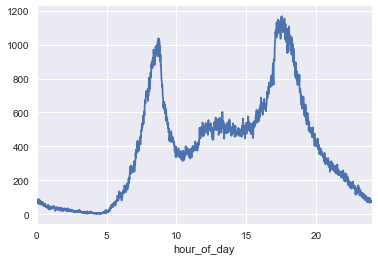

In [5]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()
# import seaborn as sns

# sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

# Assignment 4
Using the **`hours`** dataframe and the `hour_of_day` column, perform the following cells. 

Explain the results in a **paragraph + charts** of  to describe which model you'd recommend


## 1. Create 3 models fit to `hour_of_day` with varying polynomial degrees 

In [6]:
hours.describe()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,383.610417,383.610417,383.610417,383.610417,383.610417,383.610417,383.610417,383.610417,383.610417,383.610417,383.610417,11.991667
std,304.237303,304.237303,304.237303,304.237303,304.237303,304.237303,304.237303,304.237303,304.237303,304.237303,304.237303,6.930606
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,5.995000
50%,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,11.990000
75%,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,17.985000
max,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,23.980000


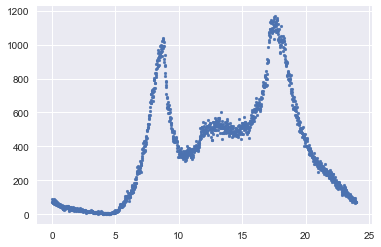

In [7]:
#import linear model function from sci-kit learn
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

#assign linear model parameters
x = hours[['hour']]
y = hours.start

#plot the x and y values
plt.scatter(x, y, s = 8)

In [8]:
#create linear model
lin = linear_model.LinearRegression()
lin.fit(x,y)
#get coefficient and y intercept
lin.coef_, lin.intercept_

(array([ 18.51119838]), 161.63029612344457)

This line does not fit the data very well


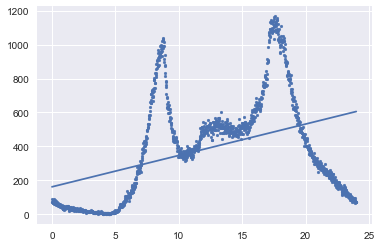

In [9]:
#get plot and test fit for model
plt.scatter(x,y, s=8)
plt.plot(x, x*lin.coef_ + lin.intercept_)

print('This line does not fit the data very well')

In [17]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#transform features to polynomial features with 10 degrees
poly = PolynomialFeatures(degree = 10)
x10 = poly.fit_transform(x)

#create new linear model based on polynomial with 10 degrees
lin1 = linear_model.LinearRegression()
lin1.fit(x10, y)

#get coefficient and y intercepts for polynomial function
(lin1.coef_, lin1.intercept_)

(array([  0.00000000e+00,  -4.34148897e+02,   5.70156390e+02,
         -3.16063157e+02,   8.69076506e+01,  -1.31665590e+01,
          1.17464061e+00,  -6.32427290e-02,   2.01679833e-03,
         -3.50012055e-05,   2.54055798e-07]), 136.36543157051005)

Better fit, but not quite there


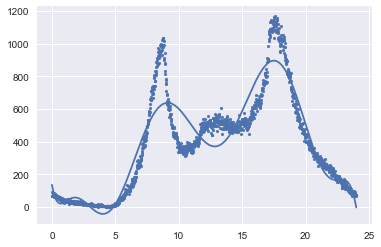

In [20]:
#get plot and test fit for model
plt.scatter(x,y, s=8)
plt.plot(x, np.dot(x10, lin1.coef_) + lin1.intercept_)

print('Better fit, but not quite there')

In [44]:
#transform features to polynomial features with 20 degrees
poly = PolynomialFeatures(degree = 20)
x20 = poly.fit_transform(x)

#create new linear model based on polynomial with 20 degrees
lin2 = linear_model.LinearRegression()
lin2.fit(x20, y)

#get coefficient and y intercepts for polynomial function
(lin2.coef_, lin2.intercept_)

(array([  0.00000000e+00,   2.90377849e-14,   4.96302826e-17,
          1.26924174e-19,   2.25293843e-20,   2.57025166e-19,
          2.81492557e-18,   2.94986797e-17,   2.93112459e-16,
          2.72265289e-15,   2.31418678e-14,   1.74102562e-13,
          1.09592702e-12,   5.16886432e-12,   1.35759154e-11,
         -4.26612678e-12,   5.36209308e-13,  -3.56101478e-14,
          1.32455081e-15,  -2.61919468e-17,   2.15142776e-19]),
 243.41070081392922)

Way off, need much lower degree polynomial


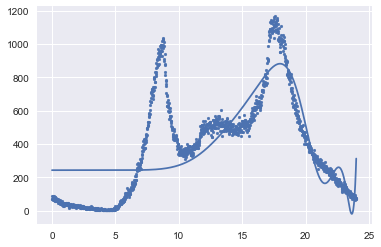

In [45]:
#get plot and test fit for model
plt.scatter(x,y, s=8)
plt.plot(x, np.dot(x20, lin2.coef_) + lin2.intercept_)

print('Way off, need much lower degree polynomial')

In [67]:
#transform features to polynomial features with 15 degrees
poly = PolynomialFeatures(degree = 15)
x15 = poly.fit_transform(x)

#create new linear model based on polynomial with 15 degrees
lin3 = linear_model.LinearRegression()
lin3.fit(x15, y)

#get coefficient and y intercepts for polynomial function
(lin3.coef_, lin3.intercept_)

(array([  0.00000000e+00,  -2.99854935e-06,   1.46547650e-07,
          9.15213102e-07,   5.81355514e-06,   3.23980095e-05,
          1.50423894e-04,   5.19193408e-04,   9.68297306e-04,
         -3.93912176e-04,   6.31274855e-05,  -5.47474781e-06,
          2.80607559e-07,  -8.53435118e-09,   1.42904618e-10,
         -1.01763229e-12]), 29.280181185404444)

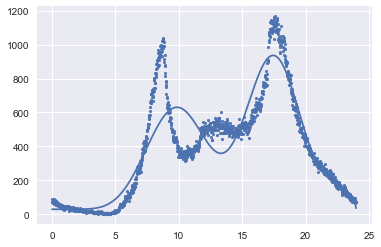

In [68]:
#get plot and test fit for model
plt.scatter(x,y, s=8)
plt.plot(x, np.dot(x15, lin3.coef_) + lin3.intercept_)


Three models were computed to determine a line that would fit the data. After over a dozen tests, a line with
a polynomial value between 10 and 15 provided the best results. Of the plotted models, the best of the bunch
was lin3, which contained a 15 degree polynomial line of fit. This model fit the points with the least error; 
however, it was still not a model that has greatpredictive power. See the below figure to see how the 
different lines fit the data.


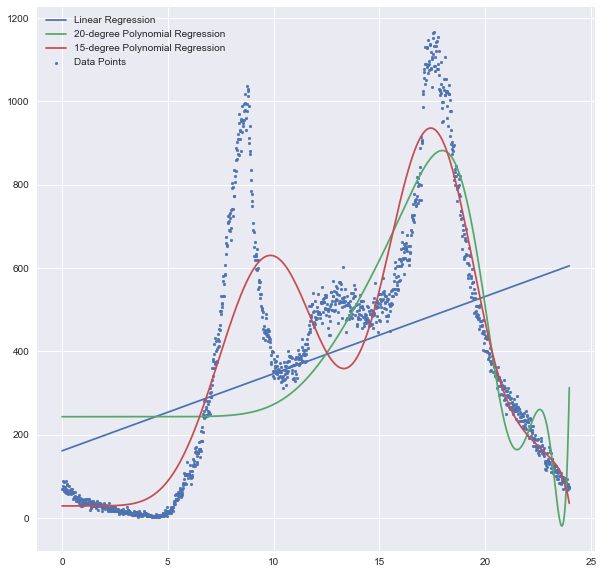

In [117]:
print('''Three models were computed to determine a line that would fit the data. After over a dozen tests, a line with
a polynomial value between 10 and 15 provided the best results. Of the plotted models, the best of the bunch
was lin3, which contained a 15 degree polynomial line of fit. This model fit the points with the least error; 
however, it was still not a model that has greatpredictive power. See the below figure to see how the 
different lines fit the data.''')



#plot all models together
fig = plt.figure(figsize = (10,10))
plt.scatter(x,y, s=8, label="Data Points")
sub1 = plt.plot(x, x*lin.coef_ + lin.intercept_, label="Linear Regression")
sub2 = plt.plot(x, np.dot(x20, lin2.coef_) + lin2.intercept_, label ="20-degree Polynomial Regression")
sub3 = plt.plot(x, np.dot(x15, lin3.coef_) + lin3.intercept_, label ="15-degree Polynomial Regression")
plt.legend()


## 2. Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


In [134]:
#create linear ridge regression
ridge = linear_model.Ridge(alpha = 0)
ridge.fit(x, y)
ridge.coef_, ridge.intercept_

(array([ 18.51119838]), 161.63029612344482)

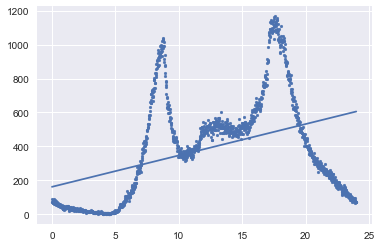

In [135]:
#plot ridge regression
plt.scatter(x, y, s=8)
plt.plot(x, x*ridge.coef_ + ridge.intercept_)

In [159]:
#polynomial ridge regression
ridge.fit(x10, y)
(ridge.coef_, ridge.intercept_)

(array([  0.00000000e+00,   1.91236788e+01,   1.14676305e+02,
         -1.15509220e+02,   3.92778085e+01,  -6.43212536e+00,
          5.81153830e-01,  -3.03356310e-02,   9.00899259e-04,
         -1.38616351e-05,   8.26715876e-08]), 23.008359781528497)

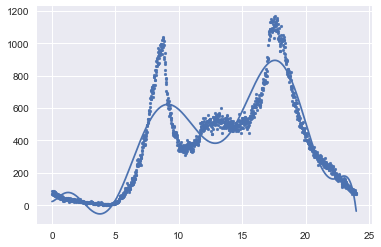

In [161]:
#plot polynomial ridge regression
plt.scatter(x, y, s = 8)
plt.plot(x, np.dot(x10, ridge.coef_) + ridge.intercept_)

In [145]:
#create linear ridge regression
ridge1 = linear_model.Ridge(alpha = 5)
ridge1.fit(x, y)
ridge1.coef_, ridge.intercept_

(array([ 18.50985941]), 161.64635256934724)

In [162]:
#polynomial ridge regression
ridge1.fit(x10, y)
(ridge1.coef_, ridge1.intercept_)

(array([  0.00000000e+00,   1.91236788e+01,   1.14676305e+02,
         -1.15509220e+02,   3.92778085e+01,  -6.43212536e+00,
          5.81153830e-01,  -3.03356310e-02,   9.00899259e-04,
         -1.38616351e-05,   8.26715876e-08]), 23.008359781528497)

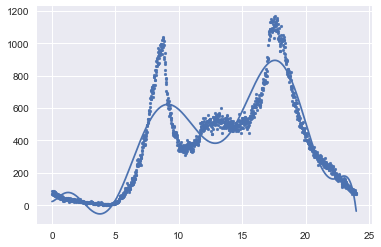

In [164]:
#plot polynomial ridge regression
plt.scatter(x, y, s = 8)
plt.plot(x, np.dot(x10, ridge1.coef_) + ridge1.intercept_)

In [170]:
#create linear ridge regression
ridge2 = linear_model.Ridge(alpha = 10)
ridge2.fit(x10, y)
ridge2.coef_, ridge2.intercept_

(array([  0.00000000e+00,   3.98301943e+01,   7.69825005e+01,
         -9.44353092e+01,   3.35596450e+01,  -5.55112522e+00,
          4.98693005e-01,  -2.55544080e-02,   7.33067927e-04,
         -1.05935624e-05,   5.55750518e-08]), 26.385705220575119)

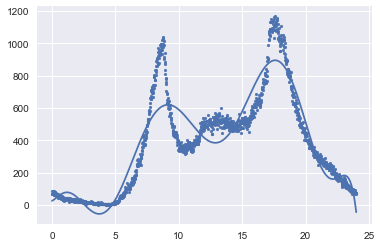

In [171]:
#plot polynomial ridge regression
plt.scatter(x, y, s = 8)
plt.plot(x, np.dot(x10, ridge2.coef_) + ridge2.intercept_)

In [174]:
#create linear ridge regression
ridge3 = linear_model.Ridge(alpha = 2)
ridge3.fit(x10, y)
ridge3.coef_, ridge2.intercept_

(array([  0.00000000e+00,  -4.74353270e+01,   1.91346265e+02,
         -1.51865441e+02,   4.83255620e+01,  -7.75337861e+00,
          7.00380977e-01,  -3.70672462e-02,   1.13246348e-03,
         -1.82995839e-05,   1.18998306e-07]), 26.385705220575119)

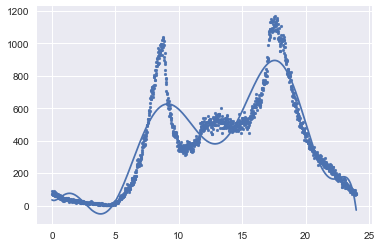

In [175]:
#plot polynomial ridge regression
plt.scatter(x, y, s = 8)
plt.plot(x, np.dot(x10, ridge3.coef_) + ridge3.intercept_)